In [1]:
# Importing the libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter('ignore')

import sklearn

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

import statsmodels.api as sm

from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.metrics import r2_score

In [3]:
# Reading the dataset

bike_pd = pd.read_csv('C:/Users/abhi/Downloads/Linear Regression Assignment/day.csv')
bike_pd.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [4]:
# Looking into the dataset for total number of columns and rows

bike_pd.shape

(730, 16)

In [5]:
# Checking the information of the dataset

bike_pd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [6]:
# Checking for the descriptive statistics

bike_pd.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


#### Insight:

- In the Bike Prediction dataset there are a total of 730 rows and 16 columns in which we need to use the 'CNT' column for the prediction purposes.

## Data Quality checks

### Check for Null values in the dataset

In [7]:
bike_pd.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

### Check for the Duplicates in the dataset

In [8]:
# Creating a copy of the original dataset for to check for the duplicates

bike_pred_dup = bike_pd
bike_pred_dup.drop_duplicates(subset=None, inplace=True)

In [9]:
# Checking the dataframe

bike_pred_dup.shape

(730, 16)

#### Insight:

- Checking the dataset, we can clearly see that there are no Missing/Null values.
- Upon checking , clearly there are exact same rows and columns as on the original dataset, therefore, no duplicates data in the original dataset.

## Data Cleaning

### Removing the unwanted and unnecessary columns

In [10]:
# Checking the columns

bike_pd.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

#### Insights:

#### Upon checking the data dictionary of the dataset, we came to a conclusion, that it's fair to remove the below mentioned columns as they are unwanted and unnecessary for our analaysis.

#### instant : 
            - This is a index column, we already have an automated index formed in here.

#### dteday :
            - This is a date column. Since, we already have separate year and month column, it's fair to remove this.

#### casual & registered:
            - Both the columns have a mixed/concatenated column named, 'cnt', so it's better to get rid of these columns.

In [11]:
# Creating a new dataframe, so that the original dataset may be preserved for the future work.

bike_pred_new = bike_pd[['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit', 'temp', 'atemp', 'hum'
                     , 'windspeed', 'cnt']]
bike_pred_new.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,1600


## Creating Dummy Variables

- We will create Dummy variables for the categorical variables namely, 'mnth, weekday, season and weathersit'.
- First, we need to convert these columns into categories for to perform any analysis.

In [12]:
# Viewing the dataset before the conversion

bike_pred_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    int64  
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    int64  
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    int64  
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 74.1 KB


In [13]:
# Converting the above mentioned columns into categories

bike_pred_new.season = bike_pred_new.season.astype('category')
bike_pred_new.weekday = bike_pred_new.weekday.astype('category')
bike_pred_new.mnth = bike_pred_new.mnth.astype('category')
bike_pred_new.weathersit = bike_pred_new.weathersit.astype('category')
bike_pred_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   season      730 non-null    category
 1   yr          730 non-null    int64   
 2   mnth        730 non-null    category
 3   holiday     730 non-null    int64   
 4   weekday     730 non-null    category
 5   workingday  730 non-null    int64   
 6   weathersit  730 non-null    category
 7   temp        730 non-null    float64 
 8   atemp       730 non-null    float64 
 9   hum         730 non-null    float64 
 10  windspeed   730 non-null    float64 
 11  cnt         730 non-null    int64   
dtypes: category(4), float64(4), int64(4)
memory usage: 55.2 KB


In [14]:
# Creating dummies of the converted variables and dropping the first variable as (n-1) 
# factors are needed for the dummy variables.

bike_pred_new = pd.get_dummies(bike_pred_new, drop_first=True)
bike_pred_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   yr            730 non-null    int64  
 1   holiday       730 non-null    int64  
 2   workingday    730 non-null    int64  
 3   temp          730 non-null    float64
 4   atemp         730 non-null    float64
 5   hum           730 non-null    float64
 6   windspeed     730 non-null    float64
 7   cnt           730 non-null    int64  
 8   season_2      730 non-null    uint8  
 9   season_3      730 non-null    uint8  
 10  season_4      730 non-null    uint8  
 11  mnth_2        730 non-null    uint8  
 12  mnth_3        730 non-null    uint8  
 13  mnth_4        730 non-null    uint8  
 14  mnth_5        730 non-null    uint8  
 15  mnth_6        730 non-null    uint8  
 16  mnth_7        730 non-null    uint8  
 17  mnth_8        730 non-null    uint8  
 18  mnth_9        730 non-null    

## Splitting into Train/Test set

#### Splitting the dataset into TRAIN-TEST SET (70:30 ratio)

In [15]:
# Checking the shape of dataset before splitting

bike_pred_new.shape

(730, 30)

In [16]:
# Using the train_test_split method for achieving train and test dataset

bike_train, bike_test = train_test_split(bike_pred_new, train_size=0.70, test_size=0.30, random_state=0)

In [17]:
# Checking the shape of train set

bike_train.shape

(510, 30)

In [18]:
# Checking the shape of test set

bike_test.shape

(219, 30)

## Exploratory Data Analysis

##### Making a Pairplot for the Numerical cols.

In [19]:
# Checking for the numerical columns

bike_pred_new.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'cnt', 'season_2', 'season_3', 'season_4', 'mnth_2', 'mnth_3', 'mnth_4',
       'mnth_5', 'mnth_6', 'mnth_7', 'mnth_8', 'mnth_9', 'mnth_10', 'mnth_11',
       'mnth_12', 'weekday_1', 'weekday_2', 'weekday_3', 'weekday_4',
       'weekday_5', 'weekday_6', 'weathersit_2', 'weathersit_3'],
      dtype='object')

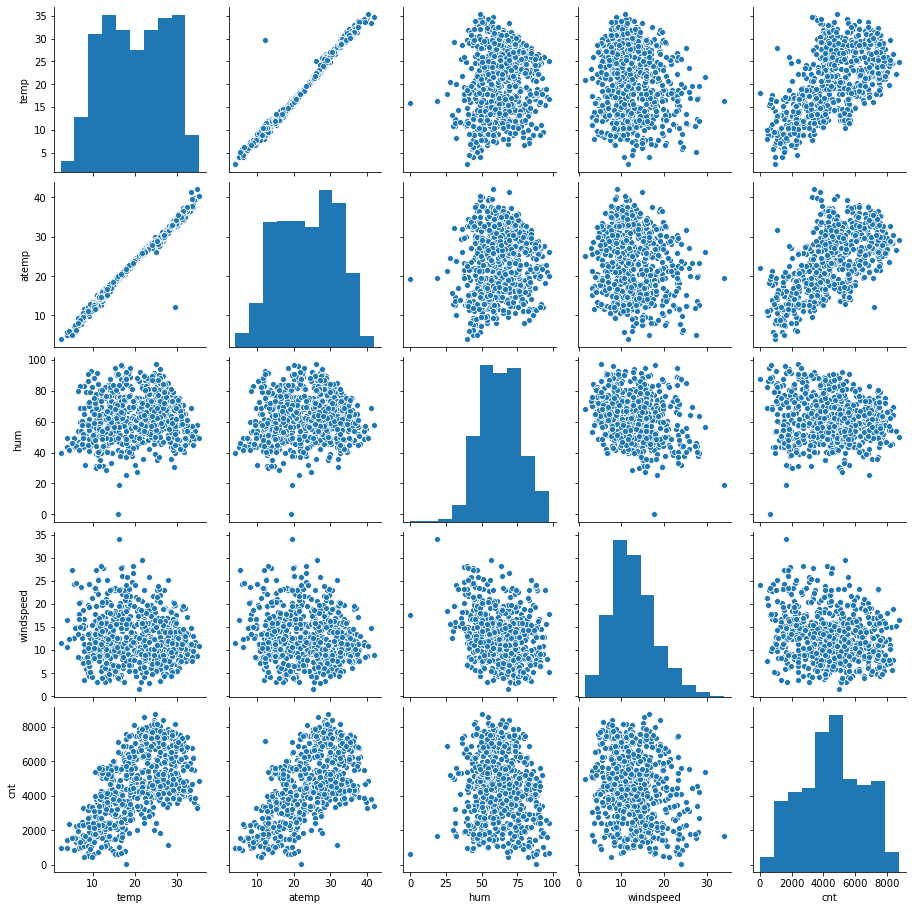

In [20]:
# Creating a pairplot using the numerical columns

bike_pred_num = bike_pred_new[['temp', 'atemp', 'hum', 'windspeed', 'cnt']]

sns.pairplot(bike_pred_num)
plt.show()

#### Insight:

- From the pairplots we can clearly conclude that there is a relation among 'temp', 'atemp' & 'cnt'.

##### Making boxplots for the categorical variables.

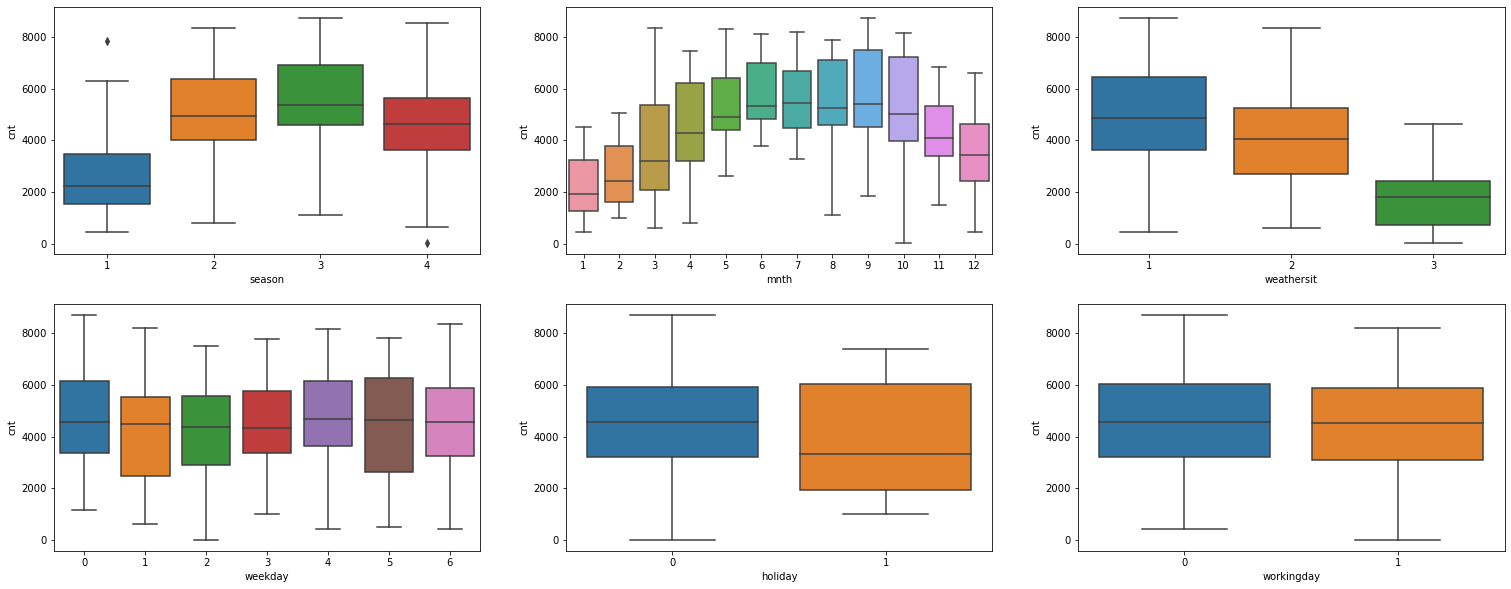

In [21]:
# Building boxplots for each categories with the help of subplots.

# We'll be using 'cnt' as target variable and all the categories as independent variables.

plt.figure(figsize=(26,10))

plt.subplot(2,3,1)
sns.boxplot(x='season', y='cnt', data=bike_pd)

plt.subplot(2,3,2)
sns.boxplot(x='mnth', y='cnt', data=bike_pd)

plt.subplot(2,3,3)
sns.boxplot(x='weathersit', y='cnt', data=bike_pd)

plt.subplot(2,3,4)
sns.boxplot(x='weekday', y='cnt', data=bike_pd)

plt.subplot(2,3,5)
sns.boxplot(x='holiday', y='cnt', data=bike_pd)

plt.subplot(2,3,6)
sns.boxplot(x='workingday', y='cnt', data=bike_pd)

plt.show()

#### Insight:

- From the "Season" boxplot we can see that almost 5000 bookings are from the season_3 compared to the other seasons.
- From the "Mnth" boxplot we can see that the months are following a trend and could be a good predictor variable. The bookings in the mid-month are above 4000.
- From the "Weathersit" boxplot we can say that maximum bookings happened in the weather 1 and it has some trends during the course of 2 years and it can be a good predictor variable for predicting the demand for the bikes.
- From the "Weekday" boxplot we can see that there seems no trend in the weekday dataset thus we can leave this variable for the prediction.
- From the "holiday" Almost most of the bike booking were happening when it is not a holiday which means this data is clearly biased. This indicates, holiday CANNOT be a good predictor for the dependent variable.
- From the "Workingday" boxplot we can see that maximum bookings happening between 4000 and 6000.

### Correlation Matrix

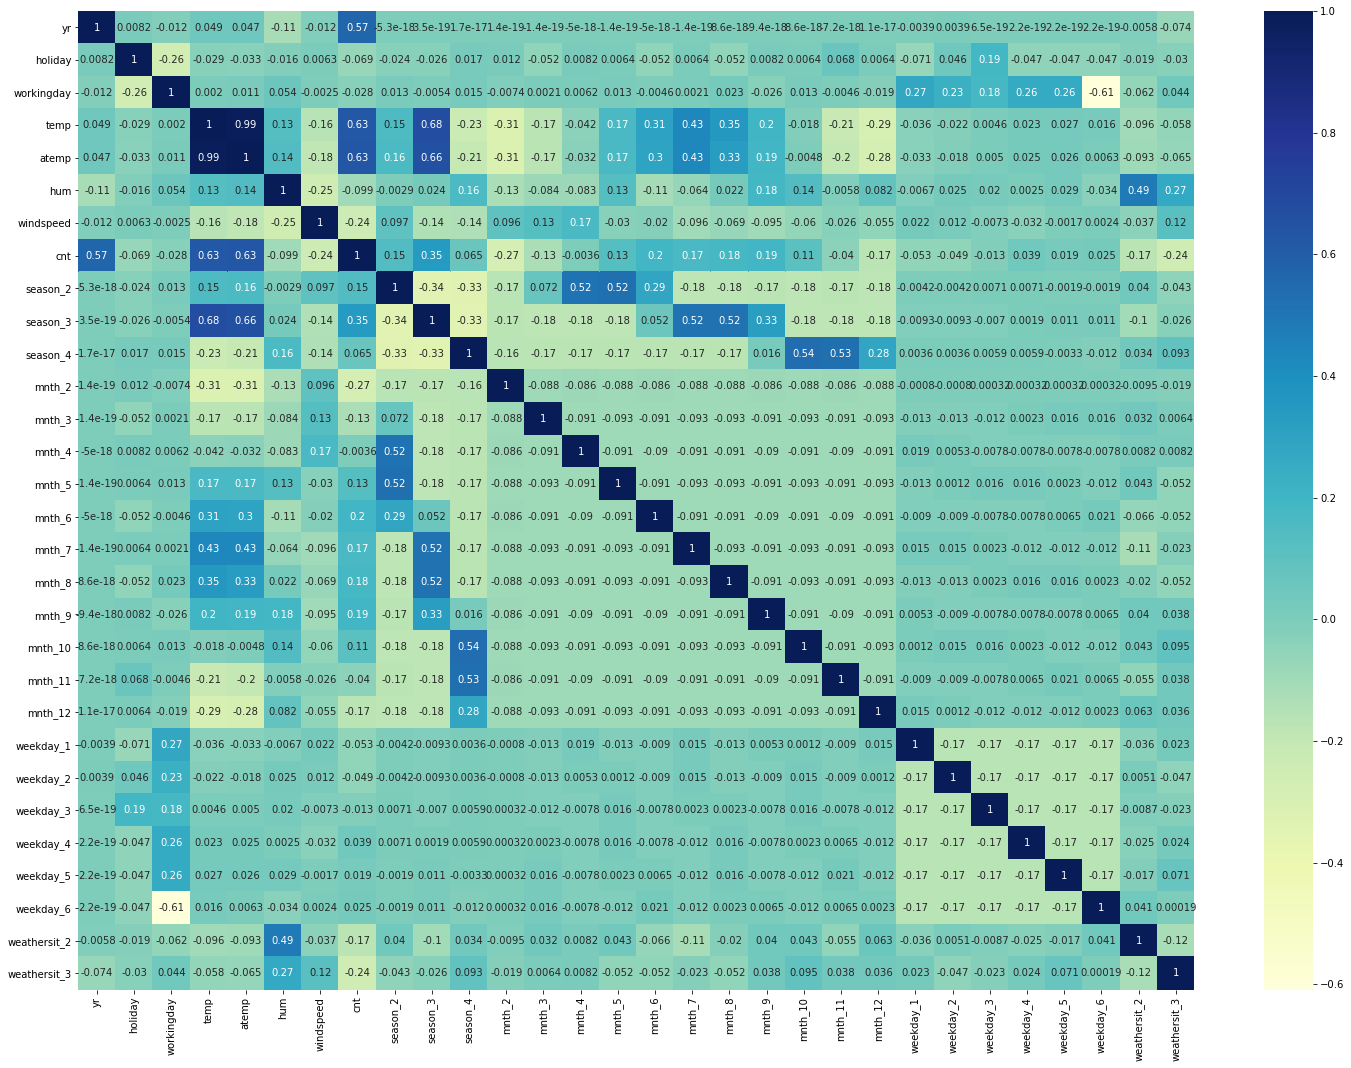

In [22]:
# Checking for the correlation among different variables with the help of heatmap.

plt.figure(figsize=(25,18))

sns.heatmap(bike_pred_new.corr(), annot=True, cmap='YlGnBu')

plt.show()

#### Insight:

- From the heatmap of the different variables of this dataset we can conclude that there seems high collinearity between some of the variables such as 'cnt, temp', 'season_3, temp', 'temp, atemp'.

## Rescaling Features

In [23]:
# Instantiating the object

scaler = MinMaxScaler()

In [24]:
# Looking the dataset before scaling

bike_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_2,season_3,...,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
235,0,0,1,27.606653,31.53460,60.5000,16.958236,5130,0,1,...,0,0,0,0,0,0,1,0,0,0
524,1,0,0,29.144153,32.41835,43.7083,9.667229,7498,1,0,...,0,0,0,0,0,0,0,0,0,0
12,0,0,0,6.765000,7.54415,47.0417,20.167000,1406,0,0,...,0,0,0,0,0,0,0,1,0,0
161,0,0,1,29.725000,33.90190,65.4583,10.374950,4966,1,0,...,0,0,1,0,0,0,0,0,0,0
556,1,0,1,29.383347,32.51355,63.3333,10.166111,7264,0,1,...,0,0,0,0,0,1,0,0,0,0


In [25]:
# Creating a list of numeric variables

num_vars = ['temp', 'atemp', 'hum', 'windspeed', 'cnt']

In [26]:
# Using the scaler() function in the numeric variables

bike_train[num_vars] = scaler.fit_transform(bike_train[num_vars])

In [27]:
# Checking the dataset after scaling

bike_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_2,season_3,...,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
235,0,0,1,0.753859,0.731037,0.488399,0.527988,0.587667,0,1,...,0,0,0,0,0,0,1,0,0,0
524,1,0,0,0.802869,0.755332,0.254640,0.255430,0.860101,1,0,...,0,0,0,0,0,0,0,0,0,0
12,0,0,0,0.089497,0.071535,0.301044,0.647940,0.159227,0,0,...,0,0,0,0,0,0,0,1,0,0
161,0,0,1,0.821384,0.796115,0.557424,0.281887,0.568799,1,0,...,0,0,1,0,0,0,0,0,0,0
556,1,0,1,0.810494,0.757949,0.527842,0.274080,0.833180,0,1,...,0,0,0,0,0,1,0,0,0,0


In [28]:
# Descriptive statistics

bike_train.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_2,season_3,...,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.500000,0.029412,0.701961,0.515088,0.510792,0.514523,0.373755,0.513956,0.258824,0.256863,...,0.080392,0.082353,0.141176,0.135294,0.139216,0.160784,0.149020,0.137255,0.335294,0.023529
std,0.500491,0.169124,0.457846,0.243011,0.227658,0.194619,0.192867,0.217056,0.438419,0.437332,...,0.272166,0.275172,0.348545,0.342373,0.346511,0.367693,0.356457,0.344454,0.472557,0.151726
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.301603,0.311891,0.361513,0.232054,0.365221,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.500000,0.000000,1.000000,0.503362,0.514074,0.513631,0.353541,0.521859,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.734800,0.704145,0.651342,0.483991,0.670156,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Building the Linear Model

In [29]:
# Dividing the Target var. & Independent var. into X and y for building the linear model

y_train = bike_train.pop('cnt')
X_train = bike_train

### RFE : Recursive Feature Elimination

In [30]:
# Calling the LinearRegression function from the SciKit Learn

lm = LinearRegression()
lm.fit(X_train, y_train)

# Running the RFE function on the Target var. & Indep. var.

rfe = RFE(lm,15)
rfe = rfe.fit(X_train, y_train)

In [31]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 5),
 ('temp', True, 1),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_2', True, 1),
 ('season_3', True, 1),
 ('season_4', True, 1),
 ('mnth_2', False, 11),
 ('mnth_3', True, 1),
 ('mnth_4', False, 2),
 ('mnth_5', True, 1),
 ('mnth_6', False, 3),
 ('mnth_7', False, 13),
 ('mnth_8', True, 1),
 ('mnth_9', True, 1),
 ('mnth_10', True, 1),
 ('mnth_11', False, 15),
 ('mnth_12', False, 12),
 ('weekday_1', False, 10),
 ('weekday_2', False, 9),
 ('weekday_3', False, 8),
 ('weekday_4', False, 6),
 ('weekday_5', False, 7),
 ('weekday_6', False, 14),
 ('weathersit_2', False, 4),
 ('weathersit_3', True, 1)]

In [32]:
# Storing the 'True' columns from the rfe.support_ list

col = X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'temp', 'atemp', 'hum', 'windspeed', 'season_2',
       'season_3', 'season_4', 'mnth_3', 'mnth_5', 'mnth_8', 'mnth_9',
       'mnth_10', 'weathersit_3'],
      dtype='object')

In [33]:
# Having a look to the columns that haven't been taken by the rfe.support_

X_train.columns[~rfe.support_]

Index(['workingday', 'mnth_2', 'mnth_4', 'mnth_6', 'mnth_7', 'mnth_11',
       'mnth_12', 'weekday_1', 'weekday_2', 'weekday_3', 'weekday_4',
       'weekday_5', 'weekday_6', 'weathersit_2'],
      dtype='object')

In [34]:
# Creating X_test df with the RFE selected vars.

X_train_rfe = X_train[col]

### Building Linear Model using Stats Model

#### Model 1:

In [35]:
# VIF Check

# Creating a dataframe that'll contain the names of all the feature variable & their respective VIF's

vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by='VIF', ascending = False)
vif

,Features,VIF
3,atemp,1015.41
2,temp,981.66
7,season_3,8.31
4,hum,8.11
6,season_2,3.96
5,windspeed,3.35
8,season_4,3.02
0,yr,1.97
11,mnth_8,1.72
13,mnth_10,1.69


In [36]:
# Adding a constant

X_train_sm1 = sm.add_constant(X_train_rfe)

# Creating a first fitted model

lr1 = sm.OLS(y_train, X_train_sm1)

In [37]:
# Using the .fit() function

lr1_model = lr1.fit()

# Checking the parameters

lr1_model.params

const           0.215619
yr              0.219541
holiday        -0.054900
temp           -0.146901
atemp           0.628665
hum            -0.230438
windspeed      -0.126951
season_2        0.118676
season_3        0.082386
season_4        0.147274
mnth_3          0.041780
mnth_5          0.058136
mnth_8          0.046234
mnth_9          0.117693
mnth_10         0.061606
weathersit_3   -0.142856
dtype: float64

In [38]:
# Printing the summary 

lr1_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.824
Model:                            OLS   Adj. R-squared:                  0.819
Method:                 Least Squares   F-statistic:                     154.5
Date:                Mon, 25 Jan 2021   Prob (F-statistic):          1.69e-175
Time:                        12:08:45   Log-Likelihood:                 499.38
No. Observations:                 510   AIC:                            -966.8
Df Residuals:                     494   BIC:                            -899.0
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.2156      0.022      9.792      0.000       0.172       0.259
yr               0.2195      0.008     26.322      0.000       0.203       0.236
holiday         -0.0549      0.024     -2.246      0.025      -0.103      -0.007
temp            -0.1469      0.236     -0.622      0.534      -0.611       0.317
atemp            0.6287      0.249      2.523      0.012       0.139       1.118
hum             -0.2304      0.025     -9.268      0.000      -0.279      -0.182
windspeed       -0.1270      0.024     -5.288      0.000      -0.174      -0.080
season_2         0.1187      0.016      7.400      0.000       0.087       0.150
season_3         0.0824      0.023      3.537      0.000       0.037       0.128
season_4         0.1473      0.015     10.039      0.000       0.118       0.176
mnth_3           0.0418      0.015      2.707      0.007       0.011       0.072
mnth_5           0.0581      0.018      3.245      0.001       0.023       0.093
mnth_8           0.0462      0.018      2.500      0.013       0.010       0.083
mnth_9           0.1177      0.018      6.449      0.000       0.082       0.154
mnth_10          0.0616      0.018      3.363      0.001       0.026       0.098
weathersit_3    -0.1429      0.030     -4.838      0.000      -0.201      -0.085
==============================================================================
Omnibus:                       84.593   Durbin-Watson:                   2.017
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              208.063
Skew:                          -0.847   Prob(JB):                     6.60e-46
Kurtosis:                       5.631   Cond. No.                         132.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Model 2:

##### Note:

- Removing the 'atemp' variable as it has a very high VIF value.

In [39]:
# Dropping the 'atemp' columns because of its high VIF Value and high P value.

X_train_new = X_train_rfe.drop(['atemp'], axis=1)

In [40]:
# VIF Check

# Creating a dataframe that'll contain the names of all the feature variable & their respective VIF's

vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by='VIF', ascending = False)
vif

,Features,VIF
2,temp,18.00
6,season_3,8.27
3,hum,6.96
5,season_2,3.95
4,windspeed,3.33
7,season_4,2.94
0,yr,1.96
10,mnth_8,1.70
12,mnth_10,1.69
9,mnth_5,1.64


In [41]:
# Adding a constant

X_train_sm2 = sm.add_constant(X_train_new)

# Creating a first fitted model

lr2 = sm.OLS(y_train, X_train_sm2)

In [42]:
# Using the .fit() function

lr2_model = lr2.fit()

# Checking the parameters

lr2_model.params

const           0.235275
yr              0.219702
holiday        -0.059083
temp            0.443149
hum            -0.223264
windspeed      -0.144586
season_2        0.121518
season_3        0.080001
season_4        0.150906
mnth_3          0.042042
mnth_5          0.057476
mnth_8          0.041636
mnth_9          0.115585
mnth_10         0.063756
weathersit_3   -0.147873
dtype: float64

In [43]:
# Printing the summary 

lr2_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.822
Model:                            OLS   Adj. R-squared:                  0.817
Method:                 Least Squares   F-statistic:                     163.3
Date:                Mon, 25 Jan 2021   Prob (F-statistic):          3.02e-175
Time:                        12:08:53   Log-Likelihood:                 496.11
No. Observations:                 510   AIC:                            -962.2
Df Residuals:                     495   BIC:                            -898.7
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.2353      0.021     11.362      0.000       0.195       0.276
yr               0.2197      0.008     26.200      0.000       0.203       0.236
holiday         -0.0591      0.025     -2.410      0.016      -0.107      -0.011
temp             0.4431      0.033     13.482      0.000       0.379       0.508
hum             -0.2233      0.025     -8.990      0.000      -0.272      -0.174
windspeed       -0.1446      0.023     -6.262      0.000      -0.190      -0.099
season_2         0.1215      0.016      7.555      0.000       0.090       0.153
season_3         0.0800      0.023      3.419      0.001       0.034       0.126
season_4         0.1509      0.015     10.281      0.000       0.122       0.180
mnth_3           0.0420      0.016      2.709      0.007       0.012       0.073
mnth_5           0.0575      0.018      3.192      0.002       0.022       0.093
mnth_8           0.0416      0.019      2.250      0.025       0.005       0.078
mnth_9           0.1156      0.018      6.306      0.000       0.080       0.152
mnth_10          0.0638      0.018      3.465      0.001       0.028       0.100
weathersit_3    -0.1479      0.030     -4.992      0.000      -0.206      -0.090
==============================================================================
Omnibus:                       80.840   Durbin-Watson:                   2.013
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              195.796
Skew:                          -0.817   Prob(JB):                     3.04e-43
Kurtosis:                       5.558   Cond. No.                         14.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Model 3:

##### Note:
- Removing 'mnth_8' variable as it has a very P-Value, as technically we should remove 'temp' variable as it has very high VIF but 'temp' is a useful attribute and it is closely related to our prediction.  

In [44]:
# Dropping the 'mnth_8' columns because of its high VIF Value and high P value.

X_train_new = X_train_new.drop(['mnth_8'], axis=1)

In [45]:
# VIF Check

# Creating a dataframe that'll contain the names of all the feature variable & their respective VIF's

vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by='VIF', ascending = False)
vif

,Features,VIF
2,temp,17.97
6,season_3,7.33
3,hum,6.90
5,season_2,3.95
4,windspeed,3.32
7,season_4,2.94
0,yr,1.96
11,mnth_10,1.69
9,mnth_5,1.64
10,mnth_9,1.31


In [46]:
# Adding a constant

X_train_sm3 = sm.add_constant(X_train_new)

# Creating a first fitted model

lr3 = sm.OLS(y_train, X_train_sm3)

In [47]:
# Using the .fit() function

lr3_model = lr3.fit()

# Checking the parameters

lr3_model.params

const           0.232785
yr              0.219818
holiday        -0.061931
temp            0.441569
hum            -0.217454
windspeed      -0.143436
season_2        0.121656
season_3        0.097470
season_4        0.152109
mnth_3          0.041776
mnth_5          0.056983
mnth_9          0.101001
mnth_10         0.062191
weathersit_3   -0.150970
dtype: float64

In [48]:
# Printing the summary 

lr3_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.820
Model:                            OLS   Adj. R-squared:                  0.816
Method:                 Least Squares   F-statistic:                     174.1
Date:                Mon, 25 Jan 2021   Prob (F-statistic):          2.74e-175
Time:                        12:08:59   Log-Likelihood:                 493.52
No. Observations:                 510   AIC:                            -959.0
Df Residuals:                     496   BIC:                            -899.8
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.2328      0.021     11.212      0.000       0.192       0.274
yr               0.2198      0.008     26.108      0.000       0.203       0.236
holiday         -0.0619      0.025     -2.519      0.012      -0.110      -0.014
temp             0.4416      0.033     13.382      0.000       0.377       0.506
hum             -0.2175      0.025     -8.768      0.000      -0.266      -0.169
windspeed       -0.1434      0.023     -6.188      0.000      -0.189      -0.098
season_2         0.1217      0.016      7.533      0.000       0.090       0.153
season_3         0.0975      0.022      4.397      0.000       0.054       0.141
season_4         0.1521      0.015     10.328      0.000       0.123       0.181
mnth_3           0.0418      0.016      2.681      0.008       0.011       0.072
mnth_5           0.0570      0.018      3.152      0.002       0.021       0.093
mnth_9           0.1010      0.017      5.867      0.000       0.067       0.135
mnth_10          0.0622      0.018      3.369      0.001       0.026       0.098
weathersit_3    -0.1510      0.030     -5.081      0.000      -0.209      -0.093
==============================================================================
Omnibus:                       82.544   Durbin-Watson:                   2.012
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              197.257
Skew:                          -0.838   Prob(JB):                     1.47e-43
Kurtosis:                       5.545   Cond. No.                         14.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Model 4:

##### Note:

- Due to high VIF Value we should remove 'Season_3' variable.

In [49]:
# Dropping the 'season_3' columns because of its high VIF Value and high P value.

X_train_new = X_train_new.drop(['season_3'], axis=1)

In [50]:
# VIF Check

# Creating a dataframe that'll contain the names of all the feature variable & their respective VIF's

vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by='VIF', ascending = False)
vif

,Features,VIF
3,hum,6.81
2,temp,5.50
4,windspeed,3.29
6,season_4,2.21
5,season_2,2.13
0,yr,1.93
10,mnth_10,1.63
8,mnth_5,1.60
9,mnth_9,1.24
7,mnth_3,1.21


In [51]:
# Adding a constant

X_train_sm4 = sm.add_constant(X_train_new)

# Creating a first fitted model

lr4 = sm.OLS(y_train, X_train_sm4)

In [52]:
# Using the .fit() function

lr4_model = lr4.fit()

# Checking the parameters

lr4_model.params

const           0.223551
yr              0.216341
holiday        -0.066944
temp            0.558921
hum            -0.220555
windspeed      -0.145188
season_2        0.073409
season_4        0.121859
mnth_3          0.030281
mnth_5          0.043351
mnth_9          0.117305
mnth_10         0.046046
weathersit_3   -0.149192
dtype: float64

In [53]:
# Printing the summary 

lr4_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.813
Model:                            OLS   Adj. R-squared:                  0.809
Method:                 Least Squares   F-statistic:                     180.3
Date:                Mon, 25 Jan 2021   Prob (F-statistic):          2.51e-172
Time:                        12:09:05   Log-Likelihood:                 483.77
No. Observations:                 510   AIC:                            -941.5
Df Residuals:                     497   BIC:                            -886.5
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.2236      0.021     10.628      0.000       0.182       0.265
yr               0.2163      0.009     25.346      0.000       0.200       0.233
holiday         -0.0669      0.025     -2.677      0.008      -0.116      -0.018
temp             0.5589      0.020     28.286      0.000       0.520       0.598
hum             -0.2206      0.025     -8.737      0.000      -0.270      -0.171
windspeed       -0.1452      0.024     -6.152      0.000      -0.192      -0.099
season_2         0.0734      0.012      6.084      0.000       0.050       0.097
season_4         0.1219      0.013      9.190      0.000       0.096       0.148
mnth_3           0.0303      0.016      1.936      0.053      -0.000       0.061
mnth_5           0.0434      0.018      2.390      0.017       0.008       0.079
mnth_9           0.1173      0.017      6.853      0.000       0.084       0.151
mnth_10          0.0460      0.018      2.499      0.013       0.010       0.082
weathersit_3    -0.1492      0.030     -4.932      0.000      -0.209      -0.090
==============================================================================
Omnibus:                       67.436   Durbin-Watson:                   2.033
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              132.640
Skew:                          -0.760   Prob(JB):                     1.58e-29
Kurtosis:                       4.983   Cond. No.                         12.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Model 5:

##### Note:

- Due to very high VIF value of 'hum' attribute we should remove it.

In [54]:
# Dropping the 'hum' columns because of its high VIF Value and high P value.

X_train_new = X_train_new.drop(['hum'], axis=1)

In [55]:
# VIF Check

# Creating a dataframe that'll contain the names of all the feature variable & their respective VIF's

vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by='VIF', ascending = False)
vif

,Features,VIF
2,temp,3.52
3,windspeed,3.08
4,season_2,2.12
0,yr,1.92
5,season_4,1.89
9,mnth_10,1.63
7,mnth_5,1.57
8,mnth_9,1.21
6,mnth_3,1.16
10,weathersit_3,1.08


In [56]:
# Adding a constant

X_train_sm5 = sm.add_constant(X_train_new)

# Creating a first fitted model

lr5 = sm.OLS(y_train, X_train_sm5)

In [57]:
# Using the .fit() function

lr5_model = lr5.fit()

# Checking the parameters

lr5_model.params

const           0.110942
yr              0.223955
holiday        -0.062727
temp            0.538346
windspeed      -0.095442
season_2        0.068782
season_4        0.107266
mnth_3          0.022847
mnth_5          0.018791
mnth_9          0.086283
mnth_10         0.036128
weathersit_3   -0.238071
dtype: float64

In [58]:
# Printing the summary 

lr5_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.785
Model:                            OLS   Adj. R-squared:                  0.780
Method:                 Least Squares   F-statistic:                     164.8
Date:                Mon, 25 Jan 2021   Prob (F-statistic):          4.20e-158
Time:                        12:09:12   Log-Likelihood:                 447.33
No. Observations:                 510   AIC:                            -870.7
Df Residuals:                     498   BIC:                            -819.9
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1109      0.018      6.220      0.000       0.076       0.146
yr               0.2240      0.009     24.582      0.000       0.206       0.242
holiday         -0.0627      0.027     -2.338      0.020      -0.115      -0.010
temp             0.5383      0.021     25.574      0.000       0.497       0.580
windspeed       -0.0954      0.025     -3.884      0.000      -0.144      -0.047
season_2         0.0688      0.013      5.318      0.000       0.043       0.094
season_4         0.1073      0.014      7.599      0.000       0.080       0.135
mnth_3           0.0228      0.017      1.364      0.173      -0.010       0.056
mnth_5           0.0188      0.019      0.977      0.329      -0.019       0.057
mnth_9           0.0863      0.018      4.802      0.000       0.051       0.122
mnth_10          0.0361      0.020      1.831      0.068      -0.003       0.075
weathersit_3    -0.2381      0.031     -7.788      0.000      -0.298      -0.178
==============================================================================
Omnibus:                       64.048   Durbin-Watson:                   2.059
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              118.511
Skew:                          -0.748   Prob(JB):                     1.84e-26
Kurtosis:                       4.827   Cond. No.                         9.71
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Model 6:

##### Note:

- Due to very high P-Value we must remove 'mnth_5' as allowed P-Value is <0.05.

In [59]:
# Dropping the 'mnth_5' columns because of its high VIF Value and high P value.

X_train_new = X_train_new.drop(['mnth_5'], axis=1)

In [118]:
# VIF Check

# Creating a dataframe that'll contain the names of all the feature variable & their respective VIF's

vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by='VIF', ascending = False)
vif

,Features,VIF
2,temp,3.47
3,windspeed,3.06
0,yr,1.92
5,season_4,1.89
8,mnth_10,1.63
4,season_2,1.59
7,mnth_9,1.21
6,mnth_3,1.14
9,weathersit_3,1.08
1,holiday,1.03


In [119]:
# Adding a constant

X_train_sm6 = sm.add_constant(X_train_new)

# Creating a first fitted model

lr6 = sm.OLS(y_train, X_train_sm6)

In [120]:
# Using the .fit() function

lr6_model = lr6.fit()

# Checking the parameters

lr6_model.params

const           0.111660
yr              0.223668
holiday        -0.061753
temp            0.539405
windspeed      -0.097623
season_2        0.075017
season_4        0.107041
mnth_3          0.020521
mnth_9          0.085772
mnth_10         0.036008
weathersit_3   -0.238626
dtype: float64

In [121]:
# Printing the summary

lr6_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.784
Model:                            OLS   Adj. R-squared:                  0.780
Method:                 Least Squares   F-statistic:                     181.3
Date:                Sat, 23 Jan 2021   Prob (F-statistic):          4.88e-159
Time:                        17:46:31   Log-Likelihood:                 446.85
No. Observations:                 510   AIC:                            -871.7
Df Residuals:                     499   BIC:                            -825.1
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1117      0.018      6.266      0.000       0.077       0.147
yr               0.2237      0.009     24.564      0.000       0.206       0.242
holiday         -0.0618      0.027     -2.303      0.022      -0.114      -0.009
temp             0.5394      0.021     25.659      0.000       0.498       0.581
windspeed       -0.0976      0.024     -3.989      0.000      -0.146      -0.050
season_2         0.0750      0.011      6.668      0.000       0.053       0.097
season_4         0.1070      0.014      7.585      0.000       0.079       0.135
mnth_3           0.0205      0.017      1.237      0.217      -0.012       0.053
mnth_9           0.0858      0.018      4.776      0.000       0.050       0.121
mnth_10          0.0360      0.020      1.825      0.069      -0.003       0.075
weathersit_3    -0.2386      0.031     -7.808      0.000      -0.299      -0.179
==============================================================================
Omnibus:                       65.150   Durbin-Watson:                   2.065
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              119.542
Skew:                          -0.762   Prob(JB):                     1.10e-26
Kurtosis:                       4.817   Cond. No.                         9.68
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Model 7:

##### Note:

- Due to high P-Value we are removing the 'mnth_3' attribute from our dataset to get correct collinearity values between the variables.

In [122]:
# Dropping the 'mnth_3' columns because of its high VIF Value and high P value.

X_train_new = X_train_new.drop(['mnth_3'], axis=1)

In [123]:
# VIF Check

# Creating a dataframe that'll contain the names of all the feature variable & their respective VIF's

vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by='VIF', ascending = False)
vif

,Features,VIF
2,temp,3.45
3,windspeed,2.91
0,yr,1.90
5,season_4,1.87
7,mnth_10,1.63
4,season_2,1.58
6,mnth_9,1.21
8,weathersit_3,1.08
1,holiday,1.03


In [124]:
# Adding a constant

X_train_sm7 = sm.add_constant(X_train_new)

# Creating a first fitted model

lr7 = sm.OLS(y_train, X_train_sm7)

In [125]:
# Using the .fit() function

lr7_model = lr7.fit()

# Checking the parameters

lr7_model.params

const           0.117222
yr              0.223913
holiday        -0.063344
temp            0.533256
windspeed      -0.097510
season_2        0.075510
season_4        0.103663
mnth_9          0.085012
mnth_10         0.036800
weathersit_3   -0.238249
dtype: float64

In [126]:
# Printing the summary

lr7_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.783
Model:                            OLS   Adj. R-squared:                  0.780
Method:                 Least Squares   F-statistic:                     201.0
Date:                Sat, 23 Jan 2021   Prob (F-statistic):          7.16e-160
Time:                        17:49:40   Log-Likelihood:                 446.06
No. Observations:                 510   AIC:                            -872.1
Df Residuals:                     500   BIC:                            -829.8
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1172      0.017      6.795      0.000       0.083       0.151
yr               0.2239      0.009     24.584      0.000       0.206       0.242
holiday         -0.0633      0.027     -2.364      0.018      -0.116      -0.011
temp             0.5333      0.020     26.093      0.000       0.493       0.573
windspeed       -0.0975      0.024     -3.983      0.000      -0.146      -0.049
season_2         0.0755      0.011      6.712      0.000       0.053       0.098
season_4         0.1037      0.014      7.483      0.000       0.076       0.131
mnth_9           0.0850      0.018      4.734      0.000       0.050       0.120
mnth_10          0.0368      0.020      1.865      0.063      -0.002       0.076
weathersit_3    -0.2382      0.031     -7.792      0.000      -0.298      -0.178
==============================================================================
Omnibus:                       64.698   Durbin-Watson:                   2.062
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              118.840
Skew:                          -0.757   Prob(JB):                     1.56e-26
Kurtosis:                       4.816   Cond. No.                         9.59
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Model 8:

##### Note:

- As permitted P-Value is <0.05, therefore removing the 'mnth_10' variable as it's slightly above 0.05.

In [127]:
# Dropping the 'mnth_10' columns because of its high VIF Value and high P value.

X_train_new = X_train_new.drop(['mnth_10'], axis=1)

In [128]:
# VIF Check

# Creating a dataframe that'll contain the names of all the feature variable & their respective VIF's

vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by='VIF', ascending = False)
vif

,Features,VIF
2,temp,3.38
3,windspeed,2.90
0,yr,1.89
4,season_2,1.58
5,season_4,1.33
6,mnth_9,1.19
7,weathersit_3,1.07
1,holiday,1.03


In [129]:
# Adding a constant

X_train_sm8 = sm.add_constant(X_train_new)

# Creating a first fitted model

lr8 = sm.OLS(y_train, X_train_sm8)

In [130]:
# Using the .fit() function

lr8_model = lr8.fit()

# Checking the parameters

lr8_model.params

const           0.113432
yr              0.223395
holiday        -0.065290
temp            0.540342
windspeed      -0.095351
season_2        0.074558
season_4        0.117481
mnth_9          0.080585
weathersit_3   -0.233835
dtype: float64

In [131]:
# Printing the summary

lr8_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.782
Model:                            OLS   Adj. R-squared:                  0.778
Method:                 Least Squares   F-statistic:                     224.6
Date:                Sat, 23 Jan 2021   Prob (F-statistic):          2.60e-160
Time:                        17:52:20   Log-Likelihood:                 444.30
No. Observations:                 510   AIC:                            -870.6
Df Residuals:                     501   BIC:                            -832.5
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1134      0.017      6.605      0.000       0.080       0.147
yr               0.2234      0.009     24.478      0.000       0.205       0.241
holiday         -0.0653      0.027     -2.433      0.015      -0.118      -0.013
temp             0.5403      0.020     26.842      0.000       0.501       0.580
windspeed       -0.0954      0.025     -3.889      0.000      -0.144      -0.047
season_2         0.0746      0.011      6.618      0.000       0.052       0.097
season_4         0.1175      0.012     10.011      0.000       0.094       0.141
mnth_9           0.0806      0.018      4.516      0.000       0.046       0.116
weathersit_3    -0.2338      0.031     -7.651      0.000      -0.294      -0.174
==============================================================================
Omnibus:                       58.223   Durbin-Watson:                   2.066
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              100.980
Skew:                          -0.712   Prob(JB):                     1.18e-22
Kurtosis:                       4.650   Cond. No.                         9.56
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

##### Insight:

- This model i.e. Model 8, looks good, as there seems to be VERY LOW Multicollinearity between the predictors and the p-values for all the predictors seems to be significant. For now, we will consider this as our final model.
- There seems a slight P-Value in the 'Holiday' variable but it is well below the P-Value limit i.e. 0.05, therefore it is safe to keep it for further prediction analysis.

## Final Model Interpretation

### Hypothesis Testing:

- Hypothesis statement states that:

H0 : B1 = B2 = ... = Bn = 0

H1 : Bi != 0

Here H0 --> Null Hypothesis
     H1 --> Alternate Hypothesis.

- Model coefficient values,

    - const = 0.1134
    - yr = 0.2234
    - holiday = -0.0653
    - temp = 0.5403
    - windspeed	= -0.0954	
    - season_2	= 0.0746	
    - season_4	= 0.1175
    - mnth_9 = 0.0806
    - weathersit_3 = -0.2338

##### Insight:

- It is evident from the Model 8 that none of the coefficients are equal to 0, which means REJECT THE NULL HYPOTHESIS.

### F-Statistic:

- F-Statistic is used for overall significance of the model.
    - The F-Statistic value: 224.6
    - The Prob(F-Statistic) value : 2.60e-160

- So, as the P-Value is ~0.000 and from the F-Statistic data we can conclude that our prediction model is significant.

### Equation for the best fit line:

##### cnt = 0.1134 + (yr *  0.2234) + (holiday * (-0.0653)) + (temp *  0.5403) + (windspeed *  (-0.0954)) + (season_2 * 0.0746) + (season_4 * 0.1175) + (mnth_9 * 0.0806) + (weathersit_3 * (-0.2338))

### Interpretation of the equation:

- YR - Coefficient of yr indicates that a unit increase in yr variable, will increase bike hirings by 0.2234 values.
- HOLIDAY - Coefficient of holiday indicates that a unit increase in holiday variable, will decrease the bike hiring by 0.0653 values.
- TEMP - Coefficient of temp indicates that a unit increase in temp variable, will increase the bike hiring by 0.5403 values.
- WINDSPEED - Coefficient of the windspeed indicates that a unit increase in windspeed data, will decrease the bike hiring by 0.0954 values.
- SEASON_3 - Coefficient of season_3 indicates that w.r.t. to Season_1, a unit increase in the season_3, will increase the bike hiring by 0.0746 values.
- SEASON_4 - Coefficient of season_4 indicates that w.r.t. to Season_1, a unit increase in the season_4, will increase the bike hiring by 0.1175 values.
- MNTH_9 - Coefficient of mnth_3 indicates that w.r.t. to mnth_1, a unit increase in the mnth_9, will increase the bike hiring by 0.0806 values.
- WEATHERSIT_3 - Coefficient of weathersit_3 indicates that w.r.t. to weathersit_1, a unit increase in the weathersit_3, will decrease the bike hiring by 0.2338 values.

## Validate Assumptions

#### Error Terms are distributed normally with mean zero (not X, Y)

##### Residual Analysis of Train data

In [132]:
y_train_pred = lr8_model.predict(X_train_sm8)

In [133]:
res = y_train - y_train_pred

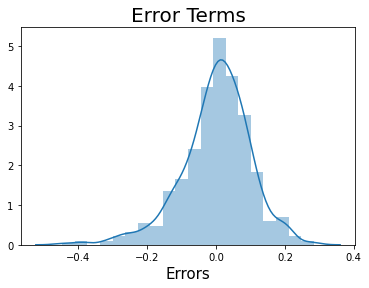

In [136]:
# Plotting histogram of the error terms

sns.distplot((res), bins=20)
plt.title('Error Terms', fontsize=20)
plt.xlabel('Errors', fontsize=15)

plt.show()

##### Insight:

- From the above histogram, we could see that the Residuals are normally distributed. Hence our assumption for Linear Regression is valid.

#### Linear Relationship

In [1]:
# Creating a pairplot using the numerical columns

bike_pred_num = bike_pred_new[['temp', 'atemp', 'hum', 'windspeed', 'cnt']]

sns.pairplot(bike_pred_num)
plt.show()

NameError: name 'bike_pred_new' is not defined

##### Insight:

- Using the pair plot, we could see there is a linear relation between temp and atemp variable with the predictor ‘cnt’.

#### No Multicollinearity among the predictor variables

In [137]:
# VIF Check

# Creating a dataframe that'll contain the names of all the feature variable & their respective VIF's

vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by='VIF', ascending = False)
vif

,Features,VIF
2,temp,3.38
3,windspeed,2.90
0,yr,1.89
4,season_2,1.58
5,season_4,1.33
6,mnth_9,1.19
7,weathersit_3,1.07
1,holiday,1.03


##### Insight:

- From the VIF calculation we could find that there is no multicollinearity existing between the predictor variables, as all the values are within permissible range of below 5. 

## Making Prediction using Final Model

It's time to predict the final model using the Test dataset as with the help of Train dataset we have made our assumptions above.

#### Applying Scaler function

In [140]:
# Using scaler.transform as we want our Test data to predict learned from the Training data.

num_vars = ['temp', 'atemp', 'hum', 'windspeed', 'cnt']

bike_test[num_vars] = scaler.transform(bike_test[num_vars])

bike_test.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_2,season_3,...,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
196,0,0,1,0.771285,0.741444,0.460557,0.415865,0.678900,0,1,...,0,0,1,0,0,0,0,0,0,0
187,0,0,0,0.854058,0.808256,0.552784,0.292782,0.525771,0,1,...,0,0,0,0,0,0,0,1,0,0
14,0,0,1,0.178804,0.205177,0.340487,0.289684,0.141049,0,0,...,0,0,1,0,0,0,0,0,1,0
31,0,0,1,0.125012,0.186509,0.801018,0.027323,0.153935,0,0,...,0,0,0,0,0,1,0,0,1,0
390,1,0,0,0.320391,0.353539,0.717517,0.077873,0.466291,0,0,...,0,0,0,0,0,0,0,1,1,0


In [141]:
# Descriptive statistics

bike_test.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_2,season_3,...,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,...,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.497717,0.027397,0.666667,0.537535,0.530211,0.533186,0.365412,0.520493,0.237443,0.260274,...,0.082192,0.091324,0.150685,0.164384,0.150685,0.100457,0.127854,0.150685,0.342466,0.041096
std,0.501140,0.163612,0.472484,0.230350,0.215531,0.206381,0.198115,0.236180,0.426491,0.439789,...,0.275286,0.288730,0.358561,0.371472,0.358561,0.301297,0.334692,0.358561,0.475622,0.198967
min,0.000000,0.000000,0.000000,-0.048868,-0.027173,-0.353829,-0.049874,0.067073,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.359598,0.370098,0.386311,0.226618,0.354809,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.564352,0.567870,0.529582,0.327053,0.519673,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.722275,0.693736,0.678414,0.463343,0.723194,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,0.982573,1.019965,0.986079,1.165056,0.981707,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#### Dividing into X_test and y_test

In [142]:
y_test = bike_test.pop('cnt')
X_test = bike_test

In [143]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 219 entries, 196 to 200
Data columns (total 29 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   yr            219 non-null    int64  
 1   holiday       219 non-null    int64  
 2   workingday    219 non-null    int64  
 3   temp          219 non-null    float64
 4   atemp         219 non-null    float64
 5   hum           219 non-null    float64
 6   windspeed     219 non-null    float64
 7   season_2      219 non-null    uint8  
 8   season_3      219 non-null    uint8  
 9   season_4      219 non-null    uint8  
 10  mnth_2        219 non-null    uint8  
 11  mnth_3        219 non-null    uint8  
 12  mnth_4        219 non-null    uint8  
 13  mnth_5        219 non-null    uint8  
 14  mnth_6        219 non-null    uint8  
 15  mnth_7        219 non-null    uint8  
 16  mnth_8        219 non-null    uint8  
 17  mnth_9        219 non-null    uint8  
 18  mnth_10       219 non-null  

In [145]:
# Selecting the variables

col1 = X_train_new.columns

X_test = X_test[col1]

In [146]:
# Adding constant variable to test df

X_test_sm8 = sm.add_constant(X_test)
X_test_sm8.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 219 entries, 196 to 200
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   const         219 non-null    float64
 1   yr            219 non-null    int64  
 2   holiday       219 non-null    int64  
 3   temp          219 non-null    float64
 4   windspeed     219 non-null    float64
 5   season_2      219 non-null    uint8  
 6   season_4      219 non-null    uint8  
 7   mnth_9        219 non-null    uint8  
 8   weathersit_3  219 non-null    uint8  
dtypes: float64(3), int64(2), uint8(4)
memory usage: 11.1 KB


In [147]:
# Making Predictions using the final model

y_pred = lr8_model.predict(X_test_sm8)

## Model Evaluation

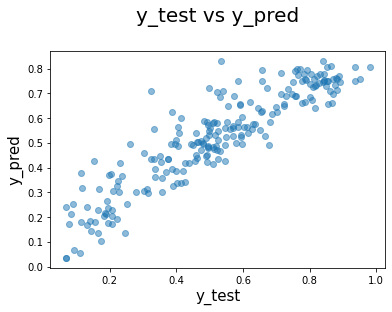

In [150]:
# Plotting y_test and y_pred to understand

plt.scatter(y_test, y_pred, alpha=0.5)
plt.title('y_test vs y_pred\n', fontsize=20)
plt.xlabel('y_test', fontsize=15)
plt.ylabel('y_pred', fontsize=15)

plt.show()

## R^2 Value for Test data

In [152]:
r2_score(y_test, y_pred)

0.8175281230248297

## Adjusted R^2 Value for Test data

In [153]:
# Getting the shape of test data

X_test.shape

(219, 8)

In [157]:
# Formula for R^2 adjusted: R^2 adj. = (1−(1−R^2)∗(n−1)/(n−p−1))

# Here, n is the rows & p is the columns

n = X_test.shape[0]
p = X_test.shape[1]
r2 = r2_score(y_test, y_pred)

adj_r2 = (1-(1-r2)*(n-1)/(n-p-1))
adj_r2

0.8105768134257756

## Final Comparision of the result

#### Train R^2 : 0.782
#### Train Adjusted R^2 : 0.778
#### Test R^2 : 0.817
#### Test Adjusted R^2 : 0.810

##### The model seems to have predicted pretty well.

## Final Report

##### As per the Final Model, the top 3 Predictor Variables that are needed for the prediction purposes are:

    - YR - Coefficient of yr indicates that a unit increase in yr variable, will increase bike hirings by 0.2234 values.
    - HOLIDAY - Coefficient of holiday indicates that a unit increase in holiday variable, will decrease the bike hiring by 0.0653 values.
    - TEMP - Coefficient of temp indicates that a unit increase in temp variable, will increase the bike hiring by 0.5403 values.
    
##### The above variables must be in the priority to predict the Bike Sharing Demand, there are some more variables that also must be considered for the prediction:

    - WINDSPEED - Coefficient of the windspeed indicates that a unit increase in windspeed data, will decrease the bike hiring by 0.0954 values.
    - SEASON_3 - Coefficient of season_3 indicates that w.r.t. to Season_1, a unit increase in the season_3, will increase the bike hiring by 0.0746 values.
    - SEASON_4 - Coefficient of season_4 indicates that w.r.t. to Season_1, a unit increase in the season_4, will increase the bike hiring by 0.1175 values.
    - MNTH_9 - Coefficient of mnth_3 indicates that w.r.t. to mnth_1, a unit increase in the mnth_9, will increase the bike hiring by 0.0806 values.
    - WEATHERSIT_3 - Coefficient of weathersit_3 indicates that w.r.t. to weathersit_1, a unit increase in the weathersit_3, will decrease the bike hiring by 0.2338 values.

Note:

- The details of weathersit_1 & weathersit_3: 
        - weathersit_1: Clear, Few clouds, Partly cloudy, Partly cloudy 
        - weathersit_3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds. 
- The details of season1, season_3 & season4: 
        - season1: spring 
        - season3: fall
        - season4: winter